In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
file_name = "parking_citations.corrupted.csv"

In [3]:
df = pd.read_csv(file_name, low_memory = False)
df.shape

(8726014, 19)

In [4]:
df.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

# Obtain Trainable Data

In [5]:
# split dataset into actual test and train dataset
# extract data where make is  available
df_test = df[df['Make'].isnull()]
df = df[~df['Make'].isnull()]

print("Test set shape:", df_test.shape)
print("Train set shape:", df.shape)

Test set shape: (4368470, 19)
Train set shape: (4357544, 19)


In [6]:
df.describe()

,Issue time,Marked Time,Plate Expiry Date,Agency,Fine amount,Latitude,Longitude
count,4.356549e+06,144922.000000,3.960997e+06,4.357538e+06,4.354349e+06,4.357543e+06,4.357543e+06
mean,1.203880e+03,1055.147196,1.867826e+05,5.203218e+01,7.010876e+01,5.503485e+06,1.587400e+06
std,4.722652e+02,227.166905,5.276190e+04,9.238550e+00,3.205594e+01,3.025596e+06,2.098413e+06
min,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+01,9.999900e+04,9.999900e+04
25%,9.120000e+02,910.000000,2.016010e+05,5.100000e+01,6.300000e+01,6.421524e+06,1.821596e+06
50%,1.155000e+03,1036.000000,2.017020e+05,5.400000e+01,6.800000e+01,6.451586e+06,1.841993e+06
75%,1.511000e+03,1200.000000,2.018030e+05,5.500000e+01,7.300000e+01,6.475013e+06,1.858208e+06
max,2.359000e+03,2400.000000,5.015120e+05,9.700000e+01,5.050000e+02,4.042322e+09,4.042322e+09


# Performing necessary Preprocessing for the data

In [7]:
# check count of missing values across features
df.isnull().sum()

Ticket number                  0
Issue Date                     0
Issue time                   995
Meter Id                 3223695
Marked Time              4212622
RP State Plate               391
Plate Expiry Date         396547
VIN                      4349402
Make                           0
Body Style                  3990
Color                       1514
Location                     149
Route                      31677
Agency                         6
Violation code                 0
Violation Description        431
Fine amount                 3195
Latitude                       1
Longitude                      1
dtype: int64

In [8]:
# drop columns which have a majority of their values missing

df = df.drop(['Meter Id', 'Marked Time', 'VIN'], axis=1)
df.isnull().sum()

Ticket number                 0
Issue Date                    0
Issue time                  995
RP State Plate              391
Plate Expiry Date        396547
Make                          0
Body Style                 3990
Color                      1514
Location                    149
Route                     31677
Agency                        6
Violation code                0
Violation Description       431
Fine amount                3195
Latitude                      1
Longitude                     1
dtype: int64

In [9]:
# replace missing values with the mean values if any 
# df.isnull().sum()

# As we have a lot of data we can drop the empty rows, when we have less data we can fill the missing data with the mean values for numerical and 
# mode values for categorical

# df = df.fillna(df.mean())

df = df.dropna()
df.isnull().sum()

Ticket number            0
Issue Date               0
Issue time               0
RP State Plate           0
Plate Expiry Date        0
Make                     0
Body Style               0
Color                    0
Location                 0
Route                    0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
dtype: int64

In [10]:
df.nunique()

Ticket number            3924726
Issue Date                  1675
Issue time                  1440
RP State Plate                74
Plate Expiry Date            700
Make                        1126
Body Style                   130
Color                         71
Location                  983219
Route                       6529
Agency                        32
Violation code               270
Violation Description        284
Fine amount                   34
Latitude                  669194
Longitude                 662740
dtype: int64

In [11]:
# drop columns with too many unique values as they dont show any commmon features
# Make is being dropped as it is used to get the ground truth

df = df.drop(['Ticket number', 'Make'], axis=1)

In [12]:
df_test = df_test.drop(['Make', 'Ticket number', 'Meter Id', 'Marked Time', 'VIN'], axis =1)
df_test.dtypes

Issue Date                object
Issue time               float64
RP State Plate            object
Plate Expiry Date        float64
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

# Feature Visualization

<AxesSubplot: xlabel='Fine amount'>

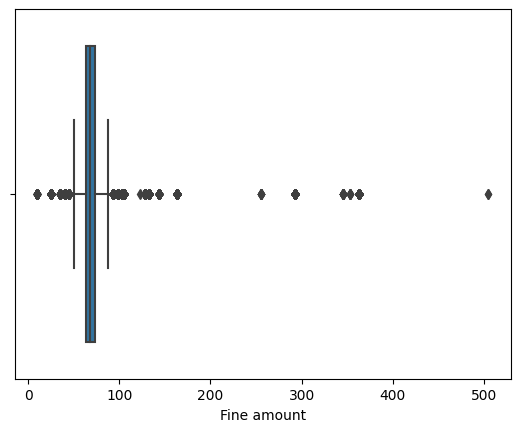

In [13]:
sns.boxplot(x=df["Fine amount"])#, showfliers=False)

<AxesSubplot: xlabel='Latitude'>

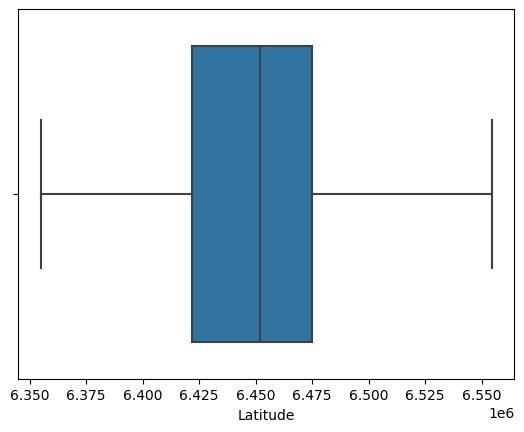

In [14]:
sns.boxplot(x=df["Latitude"], showfliers=False)

<AxesSubplot: xlabel='Latitude'>

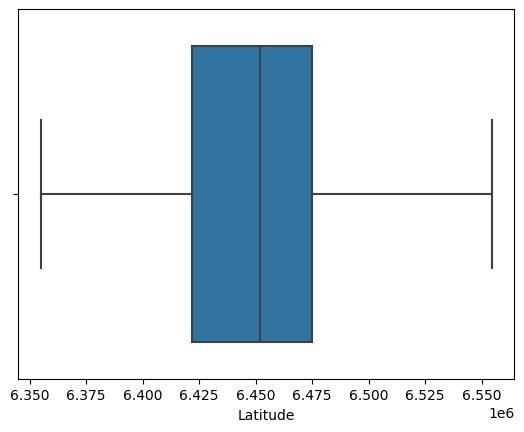

In [15]:
sns.boxplot(x=df["Latitude"], showfliers=False)

<AxesSubplot: xlabel='Issue time'>

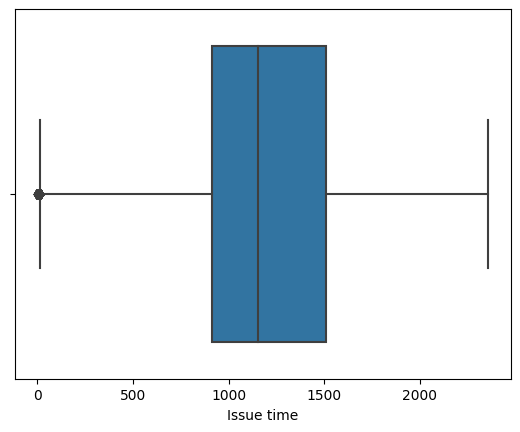

In [16]:
sns.boxplot(x=df["Issue time"])

<AxesSubplot: xlabel='Agency', ylabel='count'>

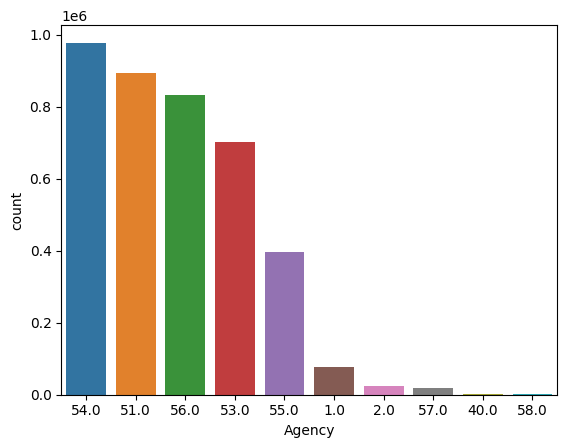

In [17]:
sns.countplot(x=df["Agency"], order=df["Agency"].value_counts().iloc[:10].index)

<AxesSubplot: xlabel='Violation code', ylabel='count'>

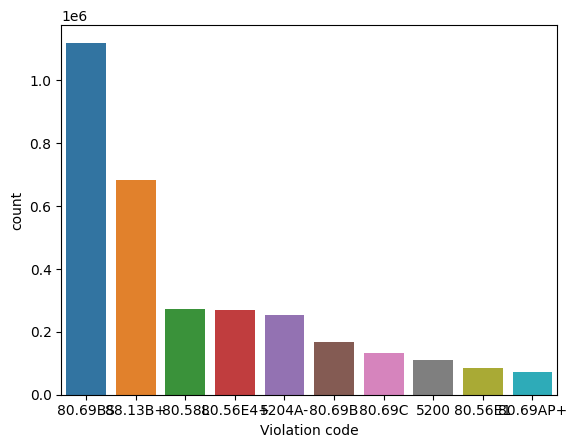

In [18]:
sns.countplot(x=df["Violation code"], order=df["Violation code"].value_counts().iloc[:10].index)

[Text(0, 0, '1301 ELECTRIC AVE'),
 Text(1, 0, '11600 SAN VICENTE BL'),
 Text(2, 0, '101 LARCHMONT BL N'),
 Text(3, 0, '2377 MIDVALE AVE'),
 Text(4, 0, '1600 IRVING TABOR CT'),
 Text(5, 0, '5901 98TH ST W'),
 Text(6, 0, '1235 FIGUEROA PL'),
 Text(7, 0, '7000 HAWTHORN AVE'),
 Text(8, 0, '3101 GLENDALE BL'),
 Text(9, 0, '4301 TUJUNGA AV'),
 Text(10, 0, '12100 VENTURA BL'),
 Text(11, 0, '100 LARCHMONT BL N'),
 Text(12, 0, '11601 SAN VICENTE BL'),
 Text(13, 0, '4300 TUJUNGA AV'),
 Text(14, 0, '11100 WEDDINGTON ST'),
 Text(15, 0, '200 LARCHMONT BL N'),
 Text(16, 0, '2110 CORINTH AVE'),
 Text(17, 0, '11001 MCCORMICK ST'),
 Text(18, 0, '1400 HOPE ST S'),
 Text(19, 0, '11700 SAN VICENTE BL')]

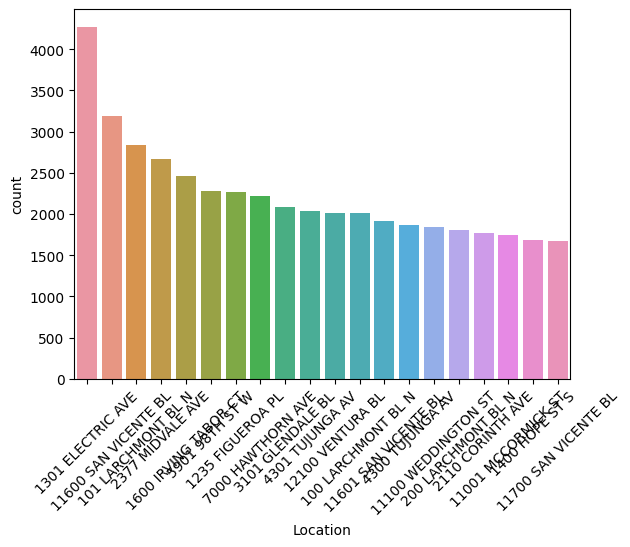

In [19]:
chart = sns.countplot(x=df["Location"], order=df["Location"].value_counts().iloc[:20].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [20]:
# Dropping Latitude and Longitude features as the values are very large and dont represent the actual values that Lat and Long usually takes

df = df.drop(['Latitude', 'Longitude'], axis=1)
df_test = df_test.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
# this is the dataset which we will build the model on 

In [ ]:
# The model details are explained more clearly in the Readme.md